# Running cell2location on NanostringWTA data
In this notebook we we map fetal brain cell types to regions of interest (ROIs) profiled with the NanostringWTA technology, using a version of our cell2location method recommended for probe based spatial transcriptomics data. This notebook should be read after looking at the main cell2location notebooks.

Load the required modules and configure theano settings:

In [1]:
import sys,os
import pickle
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from IPython.display import Image
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
import cell2location

Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda: Tesla V100-SXM2-32GB (0000:89:00.0)


In [6]:
# Download data:
os.mkdir('./data')
os.system('cd ./data && wget https://cell2location.cog.sanger.ac.uk/nanostringWTA/nanostringWTA_fetailBrain_AnnData_smallestExample.p')
os.system('cd ./data && wget https://cell2location.cog.sanger.ac.uk/nanostringWTA/polioudakis2019_meanExpressionProfiles.csv')

0

Load a data:

In [7]:
adata_wta = pickle.load(open("data/nanostringWTA_fetailBrain_AnnData_smallestExample.p", "rb" ))

In this NanostringWTA run we profiled 288 regions of interest (ROIs) spanning the full depth of the cortex and at both 19pcw and 14pcw. An example is shown in the image below, together with the cell types we expect in each region:

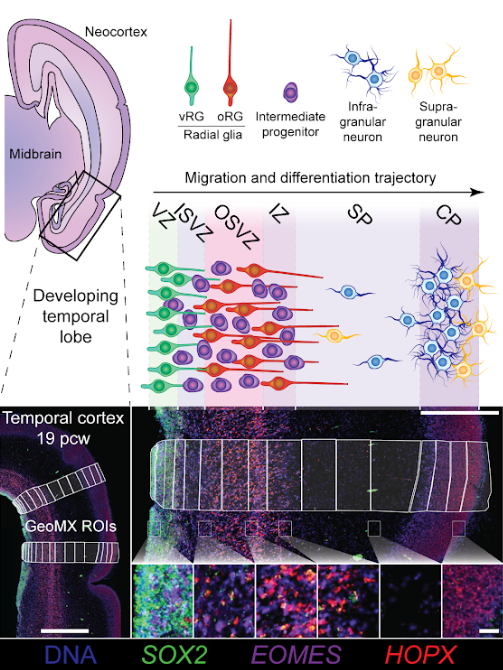

In [8]:
Image(filename='../images/GeometricROIs.PNG')

Here we load an existing matrix of average gene expression profiles for each cell type expected in our nanostringWTA data (taken from the single-cell RNAseq study Polioudakis et al., Neuron, 2019):

In [11]:
meanExpression_sc = pd.read_csv("data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

We need seperate gene probes and negative probes and if available we can also supply nuclei counts. We initialize all of those here:

In [12]:
counts_negativeProbes = np.asarray(adata_wta[:,np.array(adata_wta.var_names =='NegProbe-WTX').squeeze()].X)
counts_nuclei = np.asarray(adata_wta.obs['nuclei']).reshape(len(adata_wta.obs['nuclei']),1)
adata_wta = adata_wta[:,np.array(adata_wta.var_names != 'NegProbe-WTX').squeeze()]

As you can see the nuclei counts and negative probes need to be numpy arrays, but the gene probe counts are supplied as an AnnData object.

In [13]:
adata_wta.raw = adata_wta

Run cell2location:

Explanations of the arguments are as follows:  <br>
'model_name = cell2location.models.LocationModelWTA' > Here we tell cell2location to use the NanostringWTA model, rather than the standard model. <br>
'use_raw': False > extract the data from adata_wta.X and not from adata_wta.raw.X  <br>
'Y_data': counts_negativeProbes > we supply the negative probe information here  <br>
'cell_number_prior' and 'cell_number_var_prior': we supply information about nuclei counts here  <br>

In [14]:
cell2location.run_c2l.run_cell2location(meanExpression_sc, adata_wta, 
        model_name=cell2location.models.LocationModelWTA,
        train_args={'use_raw': False},
        model_kwargs={
        "Y_data" : counts_negativeProbes,
        "cell_number_prior" : {'cells_per_spot': counts_nuclei, 'factors_per_spot': 6, 'combs_per_spot': 3},
        "cell_number_var_prior" : {'cells_mean_var_ratio': 1, 'factors_mean_var_ratio': 1, 'combs_mean_var_ratio': 1}})

### Summarising single cell clusters ###
### Creating model ### - time 0.0 min


WARNING (theano.gof.cmodule): ModuleCache.refresh() Found key without dll in cache, deleting it. /nfs/users/nfs_a/aa16/.theano/compiledir_Linux-4.15--generic-x86_64-with-debian-buster-sid-x86_64-3.7.6-64/tmp17b1kxnq/key.pkl
WARNING (theano.gof.compilelock): Overriding existing lock by dead process '57693' (I am process '49779')


### Analysis name: LocationModelWTA_1experiments_16clusters_288locations_15124genes
### Training model ###


Average Loss = 5.0222e+07: 100%|██████████| 20000/20000 [03:16<00:00, 101.68it/s]
Finished [100%]: Average Loss = 5.0222e+07


Average Loss = 5.0222e+07: 100%|██████████| 20000/20000 [03:16<00:00, 101.73it/s]
Finished [100%]: Average Loss = 5.0222e+07


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

/nfs/team283/aa16/software/miniconda3/envs/cellpymc/lib/python3.7/site-packages/cell2location-0.5-py3.7.egg/cell2location/models/base/pymc3_model.py:449: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrow, ncol, i + 1)
/nfs/team283/aa16/software/miniconda3/envs/cellpymc/lib/python3.7/site-packages/cell2location-0.5-py3.7.egg/cell2location/models/base/pymc3_model.py:450: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(np.ceil(n_plots / ncol), ncol, i + 1)


### Sampling posterior ### - time 7.79 min


  0%|          | 0/24 [00:00<?, ?it/s]

... storing 'panel' as categorical
... storing 'construct' as categorical
... storing 'instrument_type' as categorical
... storing 'read_pattern' as categorical
... storing 'ngs_prep' as categorical
... storing 'pcr_primer_plate' as categorical
... storing 'pcr_primer_well' as categorical
... storing 'Index 1' as categorical
... storing 'Barcode 1' as categorical
... storing 'Index 2' as categorical
... storing '\tBarcode 2' as categorical
... storing 'segment_type' as categorical
... storing 'segment' as categorical
... storing 'aoi' as categorical
... storing 'dsp_date' as categorical
... storing 'dsp_well' as categorical
... storing 'slide' as categorical
... storing 'human_sample_ID' as categorical
... storing 'slide_barcode' as categorical
... storing 'age' as categorical
... storing 'source_ID' as categorical
... storing 'Sanger_sampleID' as categorical


### Saving results ###


... storing 'AOI_type' as categorical
... storing 'Region' as categorical
... storing 'Plate' as categorical
... storing 'sample' as categorical


### Ploting results ###
### Plotting posterior of W / cell locations ###
Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 KeyError('coords')
### Done ### - time 8.25 min


{'sc_obs':                       End     ExDp1     ExDp2       ExM     ExM-U       ExN  \
 TSPAN6           0.088608  0.016184  0.000000  0.048768  0.026196  0.036418   
 DPM1             0.059072  0.130456  0.078313  0.100489  0.101936  0.079940   
 SCYL3            0.012658  0.022070  0.030120  0.021890  0.029043  0.014707   
 C1orf112         0.000000  0.009809  0.012048  0.006516  0.009112  0.005103   
 FGR              0.016878  0.000490  0.000000  0.000000  0.000000  0.000000   
 ...                   ...       ...       ...       ...       ...       ...   
 ENSG00000276144  0.000000  0.000000  0.000000  0.000102  0.000569  0.000100   
 SNORD114-7       0.000000  0.000000  0.006024  0.000000  0.000000  0.000000   
 ZNF965P          0.000000  0.000000  0.000000  0.000102  0.000000  0.000100   
 GOLGA8K          0.000000  0.000981  0.000000  0.000102  0.000000  0.000000   
 GOLGA8J          0.000000  0.000000  0.000000  0.000000  0.000000  0.000200   
 
                     InCGE  

An anndata object that has the cell2location results included is saved and can be used for further analysis, as in standard cell2location:

In [2]:
adata_c2l = sc.read_h5ad('resultsLocationModelWTA_1experiments_16clusters_288locations_15124genes/sp.h5ad')

In [19]:
adata_c2l.obs.loc[:,['mean_spot_factors' in c for c in adata_c2l.obs.columns]]

,mean_spot_factorsEnd,mean_spot_factorsExDp1,mean_spot_factorsExDp2,mean_spot_factorsExM,mean_spot_factorsExM-U,mean_spot_factorsExN,mean_spot_factorsInCGE,mean_spot_factorsInMGE,mean_spot_factorsIP,mean_spot_factorsMic,mean_spot_factorsOPC,mean_spot_factorsoRG,mean_spot_factorsPer,mean_spot_factorsPgG2M,mean_spot_factorsPgS,mean_spot_factorsvRG
0,0.084664,0.189308,0.029214,0.416038,2.362057,11.295574,16.262985,7.932218,41.685520,0.742107,0.223058,0.236820,0.672671,3.205585,12.560131,13.601164
1,21.419926,7.724943,6.721371,0.333573,1.066788,0.770727,48.214741,42.975559,70.506340,8.807492,14.691536,521.252258,13.545335,49.975002,10.506875,487.543640
2,39.654678,19.112091,12.900160,21.181322,16.252541,434.558960,340.707214,129.871735,349.923279,25.703894,21.041853,290.028412,20.612944,57.256882,78.789604,84.983528
3,51.285645,8.662683,15.469158,3.503401,14.038322,896.294128,295.430023,152.729813,521.571167,30.252962,31.993980,456.301239,28.588427,86.054306,129.775269,132.642563
4,25.595606,23.515396,48.510769,188.190826,26.642292,499.026337,80.059036,41.910606,116.886253,13.355888,19.981899,98.308342,17.650003,32.258457,86.578354,41.804352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.028876,0.035472,0.006267,0.040910,0.031838,0.053754,0.025631,0.023575,0.035022,0.027488,0.013950,0.017187,0.010829,0.009468,0.020645,0.021043
284,0.043387,0.037010,0.013416,0.059270,0.047244,0.050790,0.043571,0.042204,0.043056,0.029641,0.020657,0.024773,0.011805,0.069313,0.048026,0.035278
285,0.020425,0.013803,0.007025,0.006270,0.005928,0.015476,0.014805,0.012487,0.010647,0.018965,0.005501,0.009071,0.007763,0.003181,0.005728,0.010816
286,0.015542,0.010659,0.007960,0.008583,0.007580,0.010384,0.013900,0.010033,0.013732,0.011912,0.007894,0.009918,0.004368,0.002940,0.005661,0.007249


We can also plot the same QC metrics as in standard cell2location:

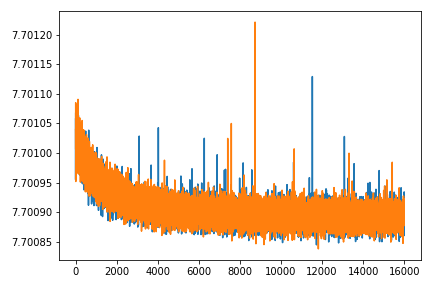

In [21]:
from IPython.display import Image
Image(filename='resultsLocationModelWTA_1experiments_16clusters_288locations_15124genes/plots/training_history_without_first_20perc.png',
      width=400)

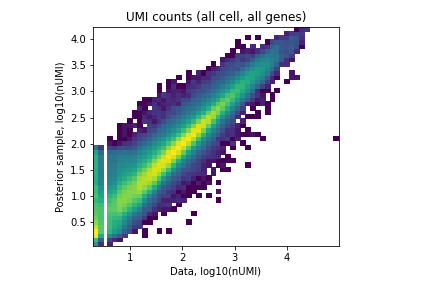

In [22]:
Image(filename='resultsLocationModelWTA_1experiments_16clusters_288locations_15124genes/plots/data_vs_posterior_mean.png',
      width=400)

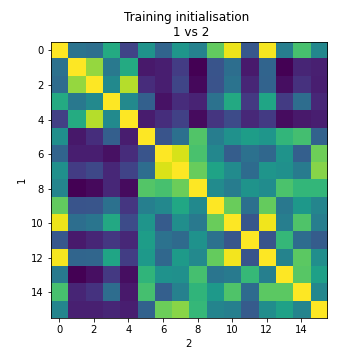

In [23]:
Image(filename='resultsLocationModelWTA_1experiments_16clusters_288locations_15124genes/plots/evaluate_stability.png',
      width=400)

Finally we have this method to plot cell type abundance in 1D across our coordinate of interest (cortical depth):

It makes most sense to plot a subset, for example on one 19pcw slide at one position:

In [3]:
colourCode = {'SPN': 'salmon', 'End': 'darkcyan', 'ExDp1': 'deepskyblue', 'ExDp2': 'blue', 'ExM': 'gold', 'ExM-U': 'yellow',
              'ExN': 'darkorange', 'InCGE': 'darkgrey', 'InMGE': 'dimgray', 'IP': 'darkviolet',
              'Mic': 'indianred', 'OPC': 'lightcoral', 'oRG': 'red', 'Per': 'darkgreen',
              'PgG2M': 'rebeccapurple', 'PgS': 'violet', 'vRG': 'lightgreen'}

In [4]:
subset_19pcw = [adata_c2l.obs['slide'].iloc[i] == '00MU' and
         adata_c2l.obs['Radial_position'].iloc[i] == 2 for i in range(len(adata_c2l.obs['Radial_position']))]

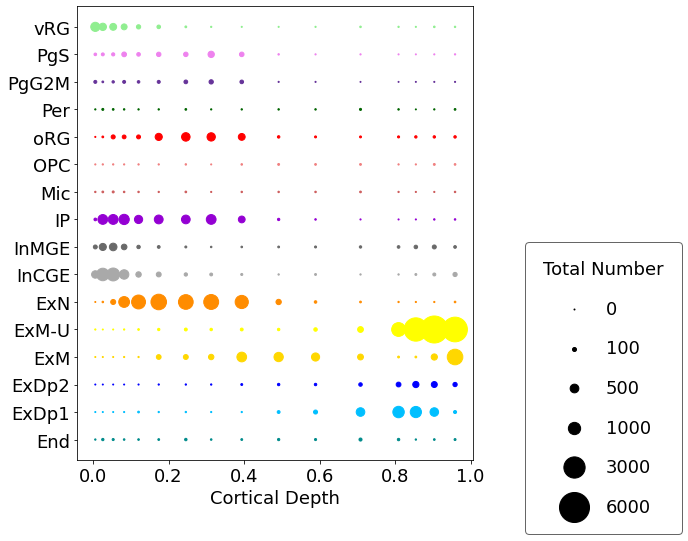

In [5]:
cell2location.plt.plot_absolute_abundances_1D(adata_c2l, subset = subset_19pcw, saving = False,
                               scaling = 0.15, power = 1, pws = [0,0,100,500,1000,3000,6000], figureSize = (12,8),
                               dimName = 'VCDepth', xlab = 'Cortical Depth', colourCode = colourCode)

You can also plot density rather than total numbers:

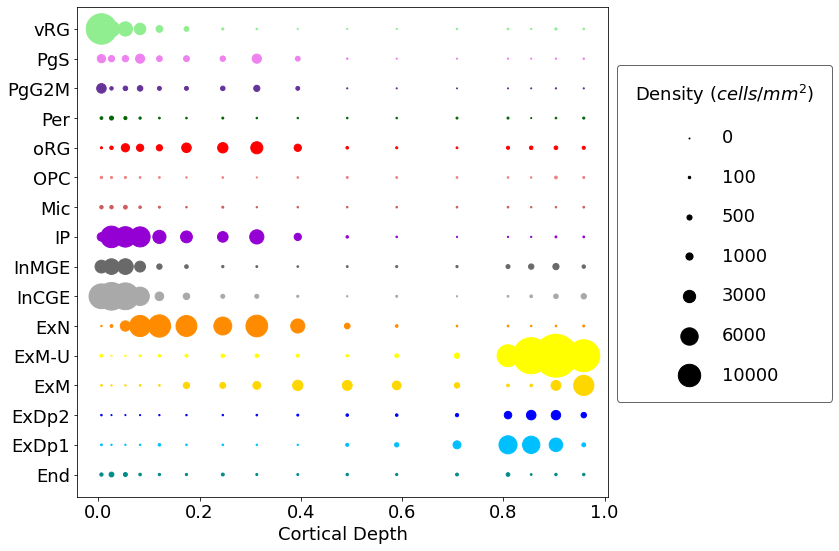

In [7]:
cell2location.plt.plot_density_1D(adata_c2l, subset = subset_19pcw, saving = False,
                               scaling = 0.05, power = 1, pws = [0,0,100,500,1000,3000,6000,10000], figureSize = (12,8),
                               dimName = 'VCDepth', areaName = 'roi_dimension', xlab = 'Cortical Depth',
                colourCode = colourCode)